In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preprocessing (Implementation Focus)  
##### 1. Load the dataset and display the first five rows. What insights can you gain?  
##### 2. Check for missing values and implement a strategy to handle them using Python.    
##### 3. Convert categorical data into a format suitable for model training. Show the implemented code.  
##### 4. Normalize or standardize numerical features if needed. Implement and justify your choice.

In [13]:
#load datasets
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\DiseasePrediction.csv")

In [14]:
dataset.shape

(4962, 133)

In [15]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,Fungal infection


In [16]:
#check for missing values
dataset.isna().sum().sum()

np.int64(116)

In [17]:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(339, 133)


In [22]:
dataset.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,...,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.141593,0.126844,0.011799,0.035398,0.011799,0.168142,0.147493,0.032448,0.044248,0.017699,...,0.011799,0.011799,0.011799,0.020649,0.017699,0.017699,0.017699,0.014749,0.017699,0.014749
std,0.349147,0.333290,0.108142,0.185057,0.108142,0.374545,0.355120,0.177450,0.205949,0.132050,...,0.108142,0.108142,0.108142,0.142416,0.132050,0.132050,0.132050,0.120726,0.132050,0.120726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dataset["prognosis"].isna().sum()

np.int64(0)

In [24]:
for col in dataset.columns:
    if dataset[col].isnull().any():
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [25]:
dataset.isna().sum().sum()

np.int64(0)

In [26]:
#conversion of prognosis into categorical data
dataset["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [27]:
#this needs label encoder, not possible with map
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
dataset["prognosis"] = le.fit_transform(dataset["prognosis"])

In [29]:
dataset.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0.0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,15


In [31]:
dataset.dtypes

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis               int64
Length: 133, dtype: object

In [32]:
#all values are 0 and 1 so no normalization is needed

### Task 2: Model Selection and Training (Implementation Focus) 
##### 1. Select and implement a machine learning model for disease prediction. Train it on the dataset. 
##### 2. Evaluate the model using accuracy, precision, recall, and F1-score. Show the implemented code. 
##### 3. Implement a function to make predictions based on user-input symptoms. 
##### 4. Compare model performance with and without feature selection. Implement and analyze the difference. 

In [33]:
# splitting the dataset
from sklearn.model_selection import train_test_split

In [34]:
# help(train_test_split)

In [35]:
X = dataset.drop(columns=["prognosis"])
y = dataset["prognosis"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
#1. using linear regression first
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
linearregression.score(X_test, y_test)

0.8239041566493461

In [39]:
#2. using logisitc regression 
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
logisticregression.score(X_test, y_test)

1.0

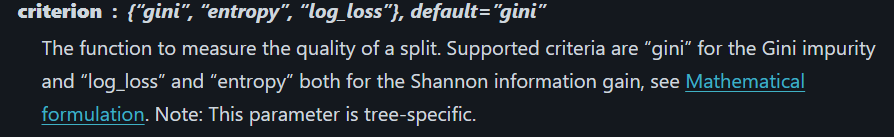

In [41]:
#3. using random forest
from sklearn.ensemble import RandomForestClassifier
randomforest_gini = RandomForestClassifier(n_estimators=100, criterion='gini')
randomforest_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_log_loss = RandomForestClassifier(n_estimators=100, criterion='log_loss')
randomforest_gini.fit(X_train, y_train)
randomforest_entropy.fit(X_train, y_train)
randomforest_log_loss.fit(X_train, y_train)

,n_estimators,100
,criterion,'log_loss'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
print("Gini     : ", randomforest_gini.score(X_test, y_test))
print("Entropy  : ", randomforest_entropy.score(X_test, y_test))
print("Log_loss : ", randomforest_log_loss.score(X_test, y_test))

Gini     :  1.0
Entropy  :  1.0
Log_loss :  0.9910714285714286


In [43]:
#4. now Naive bayes
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()

In [44]:
multinomialNB.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [45]:
multinomialNB.score(X_test, y_test)

0.9196428571428571

In [46]:
y_pred = multinomialNB.predict(X_test)

In [47]:
#as naive gave most accurate reading so finding confusion matrix for this
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report;
confusion_naive  = confusion_matrix(y_test, y_pred)
confusion_naive

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 5]])

[]

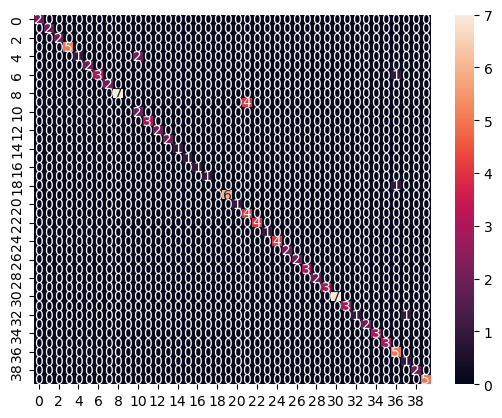

In [48]:
sns.heatmap(confusion_naive, annot=True, fmt="d")
plt.plot()